# Técnicas de reducción de varianza


In [68]:
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística

In [53]:
np.random.seed(5555)
# Muestras
N = 500
muestras = np.random.normal(np.random.rand(N))

# Cálculo de media
t1 = time.time()
g_hat = (sum(muestras))/len(muestras)
t2 = time.time()
print('media 1=',t2-t1)

t1 = time.time()
g_hat2 = np.mean(muestras)
t2 = time.time()
print('media 2=',t2-t1)

# cálculo de la varianza
t1 = time.time()
# varg_hat = sum(list(map(lambda l:l**2,muestras-g_hat)))/len(muestras)
varg_hat = np.mean(list(map(lambda l:l**2,muestras-g_hat)))
t2 = time.time()
print('varianza 1=',t2-t1)

t1 = time.time()
var_numpy = np.var(muestras)
t2 = time.time()
print('varianza 2=',t2-t1)

print('creada:',varg_hat,'numpy:',var_numpy)


media 1= 0.0
media 2= 0.0
varianza 1= 0.0010006427764892578
varianza 2= 0.0005021095275878906
creada: 1.10073002784 numpy: 1.10073002784


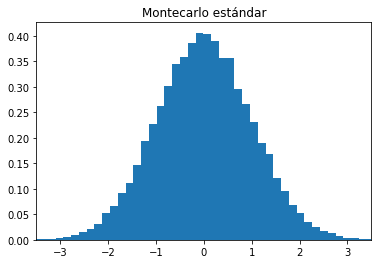

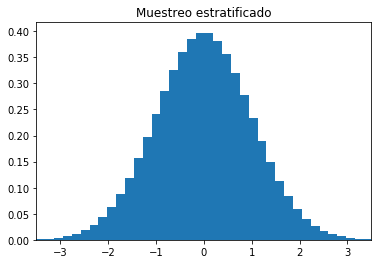

In [74]:
N = 40000
# Método montecarlo estándar
montecarlo_standar = st.norm.ppf(np.random.rand(N))
plt.hist(montecarlo_standar,50,normed=True)
plt.title('Montecarlo estándar')
plt.xlim((-3.5,3.5))
plt.show()

# Método muestreo estratificado
U2 = np.random.rand(N)
i = np.arange(0,N)
v = (U2+i)/N
m_estratificado = st.norm.ppf(v)

plt.hist(m_estratificado,50,normed=True)
plt.title('Muestreo estratificado')
plt.xlim((-3.5,3.5))
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>